(ch:expectation-variance)=
# 기댓값과 분산

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.
`seaborn` 라이브러리는 통계 관련 데이터의 정보를 보다 세련되고 정확하게 전달하는 그래프를 그리는 도구를 제공한다.
`matplotlib` 라이브러리를 바탕으로 만들어져서 함께 사용해도 된다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [6]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [7]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

확률 변수가 취할 수 있는 값들의 평균값인 기댓값과 분산을 소개한다.

- 확률 변수의 기댓값
- 확률 변수의 분산

## 이산 확률 변수의 기댓값과 분산

### 기댓값과 평균값

데이터셋의 중심역할을 하는 대표하는 값으로 {numref}`%s장 <ch:oneD-data>`에서 소개된 평균값은
확률 분포를 고려하지 않고 단순하게 주어진 값들만 이용하여 정의된다.

**평균값**

평균값은 데이터를 모두 더한 다음 데이터의 개수로 나눈다.

$$
\bar x = \frac 1 n \sum_{i=1}^{n} x_i = \frac 1 n (x_1 + x_2 + \cdots + x_n)
$$

예를 들어 1부터 6까지의 정수로 구성된 데이터셋의 평균값은 1부터 6까지 더합 값인 21을 6으로 나눈 3.5다.

In [8]:
sum(range(1, 7)) / 6

3.500000

**공정한 주사위 던지기의 기댓값**

데이터셋을 확률 변수가 취할 수 있는 값들의 집합으로 볼 때는
확률 분포를, 즉 각각의 값이 발생할 확률을 함께 고려하면서
데이터들의 중심을 정의해야 한다.

예를 들어 주사위를 던졌을 때 나오는 값들의 평균값을 계산해보자.
주사위를 던지면 1부터 6 사이의 정수 하나가 나오기에 
나온 값들의 평균값이 1부터 6까지의 정수의 평균값인 3.5가 값이 나올 것으로 기대한다.
아래 코드는 주사위 던지기를 반복해서 던지면 나온 값들의 평균값이 
실제로 3.5에 수렴함을 보여준다.

코드는 아래 내용을 구현한다.

- `np.random.choice()` 함수를 이용항 주사위 총 10만 번 던지기 구현
- 100번씩 끊어서 그때까지 나온 값들을 대상으로 누적 평균값 계산

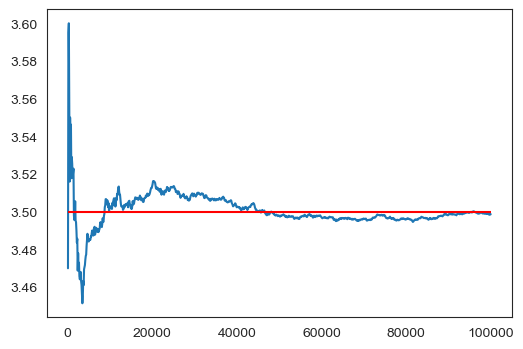

In [9]:
np.random.seed(100)

fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(111)

# 총 10만번 주사위 던지기
size = 100_001
cubic100k = np.random.choice(range(1, 7), size)

# 100번 던질 때마다 누적 평균값 계산
cubic_means = [cubic100k[:step].mean() for step in range(100, size, 100)]
plt.plot(range(100, size, 100), cubic_means)

# 평균값들의 기댓값
mu_fair = 3.5
plt.hlines(mu_fair, 100, size, color='red')

plt.show()

위 결과만 보면 확률 분포를 고려할 때와 그렇지 않을 때의 결과가 동일해 보인다.
하지만 이는 정상적인 주사위를 사용한다는 전제가 있었기에 가능했다.
실제로 `np.random.choice()` 함수를 이용하여 1부터 6 사이의 정수를 
다음과 같은 균등 분포에 따라 임의로 선택하였다.

| X | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

**불공정한 주사위 던지기의 기댓값**

불공정한 주사위를 사용하는 경우에는 실행 결과의 평균값이 다르게 나올 수 있다.
예를 들어 다음과 같이 높은 숫자일 수록 나올 확률이 높아진다고 가정하자.

| X | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/21 | 2/21 | 3/21 | 4/21 | 5/21 | 6/21 |

아래 코드는 불공정한 주사위를 던졌을 때 나오는 값을 가리키는 
확률 변수 $X$의 확률 질량 함수와 확률 분포를 정의한다.

- 불공정한 주사위 던지기의 확률 질량 함수

In [10]:
def f_unfair(x):
    return x/21

- 불공정한 주사위 던지기의 확률 분포 지정

In [11]:
prob_X = [f_unfair(x) for x in range(1, 7)]

아래 코드는 위 확률 분포를 이용하여 동일한 모의실험을 진행한다.
`np.random.choice()` 함수를 호출할 때 `p=prob_X` 키워드 인자를 지정하면
언급된 확률 분포를 따르면서 1부터 6 사이의 정수를 10만 개 선택한다.
생성된 그래프에서 빨간 직선은 불공정한 주사위를 반복해서 던질 때 나온 값들의 평균값을 가리킨다.

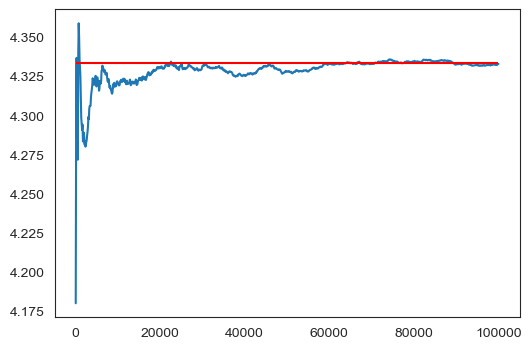

In [12]:
np.random.seed(100)

fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(111)

# 총 10만번 불공정한 주사위 던지기
size = 100_001
cubic100k = np.random.choice(range(1, 7), size, p=prob_X)

# 100번 던질 때마다 누적 평균값 계산
cubic_means = [cubic100k[:step].mean() for step in range(100, size, 100)]
plt.plot(range(100, size, 100), cubic_means)

# 평균값들의 기댓값
mu_unfair = np.sum([x * f_unfair(x) for x in range(1, 7)])
plt.hlines(mu_unfair, 100, size, color='red')

plt.show()

**확률 변수의 기댓값**

이산 확률 변수 $X$ 가 취할 수 있는 값들의 평균값을 **기댓값**<font size='2'>expectation value</font>이라 부른다.
확률 변수의 기댓값은 $E[X]$로 표기하며 다음과 같이 정의된다.
아래 식에서 함수 $f$는 확률 질량 함수를, $N$은 데이터들의 개수를 가리킨다.

$$
E[X] = x_1 \, f(x_1) + \cdots + x_n \, f(x_n) = \sum_{k=1}^{n} x_i \, f(x_i) \\[.5ex]
$$

위 식에 따르면 불공정한 주사위를 많이 던졌을 때 나올 수 있는 값들의 평균값은 4.33 정도다.

$$
1\, \frac{1}{12} + 2 \, \frac{2}{12} + 3 \, \frac{3}{12} + 4\, \frac{4}{12} + 5\, \frac{5}{12} + 6 \, \frac{6}{12} = 4.333333
$$

아래 코드가 이를 확인해준다.

In [13]:
mu_unfair = np.sum([x * f_unfair(x) for x in range(1, 7)])
mu_unfair

4.333333

반면에 정상적인 주사위를 사용한 경우에는 앞서 기댓값이 3.5로 계산된다.

$$
1\, \frac{1}{6} + 2 \, \frac{1}{6} + 3 \, \frac{1}{6} + 4\, \frac{1}{6} + 5\, \frac{1}{6} + 6 \, \frac{1}{6} = 3.5
$$

In [14]:
mu_fair = np.sum([x * 1/6 for x in range(1, 7)])
mu_fair

3.500000

결론적으로 확률 변수가 취할 수 있는 값이 동일하더라도
기댓값은 확률 변수가 따르는 확률 분포에 따라 다르게 계산된다.

**평균값과 균등 분포**

사실 평균값은 모든 데이터에 대한 선택 가능성이 동일하다는, 
즉 균등 분포를 따른다는 전제하에 계산된 기댓값이다.
데이터셋의 크기가 $n$일 때 확률 변수가 임의의 값을 취할 확률은 항상 1/n이고,
따라서 기댓값과 평균값이 동일하게 계산된다.

$$
\begin{align*}
E[X] &= x_1\, \frac 1 n + \cdots + x_n\, \frac 1 n \\
 &= (x_1 + x_2 + \cdots + x_n) \, \frac 1 n \\
 &= \bar x
\end{align*}
$$

예를 들어, 정상적인 주사위의 경우 모든 숫자가 나올 확률이 균등하게 1/6이다.
따라서 단순한 숫자로서의 평균값과 주사위 던지기의 확률 변수에 대한 기댓값
모두 3.5로 계산된다.

$$
1\, \frac 1 6 + 2 \, \frac 1 6 + \cdots + 6 \, \frac 1 6 = \frac{1 + 2 + 3 + 4 + 5 + 6}{6} = 3.5
$$

### 분산

확률 변수 $X$의 분산 $V(X)$은 
확률 변수가 가질 수 있는 값들과 기댓값 사이의 오차의 제곱에 대한 기댓값으로 
다음과 같이 정의된다.
단, $\mu_X$는 $E[X]$를 가리킨다.

$$
V(X) = E[(X - \mu_X)^2] = \sum_{i=1}^n (x_i -\mu_X)^2 \, f(x_i)
$$

분산 $V(X)$를 $\sigma_X^2$로 표현하기도 한다. 그러면 $\sigma_X$는 확률 변수 $X$의 표준편차를 나타낸다.

확률 변수의 분산은 확률 변수가 취하는 값들이 기댓값으로부터 얼마만큼 떨어져서 선택될 것인가에 대한 기댓값으로 이해될 수 있다.

앞서 언급된 불공정한 주사위의 확률 변수 $X$의 분산은 2.222222로 계산된다.

In [15]:
V_unfair = np.sum([(x - mu_unfair)**2 * f_unfair(x) for x in range(1, 7)])
V_unfair

2.222222

표준편차는 1.49정도로 계산되며 이는 주사위를 던졌을 때 얻는 숫자가 기댓값 4.33에서
평균적으로 약 1.5정도 차이가 날 것으로 기대할 수 있음을 의미한다.

In [16]:
sigma_unfair = np.sqrt(V_unfair)
sigma_unfair

1.490712

**예제: 캘리포니아 주택가격 데이터셋 중위소득 구간**

{numref}`%s장 <ch:probability>`에서 살펴 본대로 
캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 중위소득 범주를 가리키는 확률 변수 $X$의
확률 분포는 다음과 같다.

| X | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 0.041372 | 0.333011 | 0.361017 | 0.177993 | 0.086607 |

따라서 임의로 선택된 구역의 중위소득 범주에 대한 기댓값과 분산은 다음과 같다.

- 중위소득 범주 확률 분포

In [17]:
prob_income = [0.041372 , 0.333011 , 0.361017 , 0.177993 , 0.086607]

- 중위소득 범주 분포의 확률 밀도 함수

In [18]:
def f_income(x):
    assert 1 <= x <= 5
    return prob_income[x-1]

* 중위소득 범주 확률 변수의 기댓값

In [19]:
mu_income = np.sum([x * f_income(x) for x in range(1, 6)])
mu_income

2.935452

* 중위소득 범주 확률 변수의 분산

In [20]:
V_income = np.sum([(x - mu_income)**2 * f_income(x) for x in range(1, 6)])
V_income

1.018754

* 중위소득 범주 확률 변수의 표준편차

In [21]:
sigma_income = np.sqrt(V_income)
sigma_income

1.009333

### 확률 변수 선형 변환

확률 변수 $X$가 취할 수 있는 값에 상수 $a$를 곱한 다음에 상수 $b$를 더한 값을 가리키는 확률 변수 $Y$는 다음과 같이 정의된다.
확률 변수 $Y$는 확률 변수 $X$를 선형 변환한 결과이며 서로 동일한 확률 분포를 따른다.

$$
Y = a\, X + b
$$

확률 변수$Y$의 기댓값, 분산, 표준편차는 다음과 같으며 증명은 생략한다.

$$
\begin{align*}
E[Y] &= a \,E[X] + b \\[1ex]
V(Y) &= a^2 \, V(X) \\[1ex]
\sigma_Y &= |a|\, \sigma_X
\end{align*}
$$

**예제**

캘리포니아 주택가격 데이터셋의 중위소득 범주는 1부터 5 사이의 정수이고,
각각의 범주가 가리키는 중위소득의 구간은 다음과 같다.

| 범주 | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 구간 | 1.5 이하 | 1.5 - 3.0 | 3.0 - 4.5 | 4.5 - 6.0 | 6.0 이상 |

하지만 실제로는 몇 만 달러 단위로 중위소득이 움직인다.
따라서 범주별 중위소득은 실제로는 범주에 1만을 곱한 다음에 몇 천 정도 더해줘야 할 듯하다.
예를 들어 5천 정도 더해준다고 가정하자.
그러면 실제 중위소득을 가리키는 확률 변수는 다음과 같게 된다.

$$
Y = 10000\, X + 5000
$$

임의로 선택된 구역의 중위소득에 대한 기댓값은 
34,354 달러 정도로 계산된다.

- $E[Y]$ 계산

In [22]:
mu_real_income = 10000 * mu_income + 5000
mu_real_income

34354.520000

임의로 선택된 구역의 실제 중위소득은 위 기댓값으로부터 평균적으로
10,093 달러 정도의 오차를 가질 것으로 기대된다.

- $V(Y)$ 와 $\sigma_Y$ 계산

In [23]:
V_real_income = 10000**2 * V_income
sigma_real_income = 10000 * sigma_income
sigma_real_income

10093.332233

**선형 변환 결과 확인**

앞서 공식을 이용한 계산대로 결과가 나오는지 실제 확인해본다.
아래 표는 범주에 1만을 곱한 다음에 5천을 더한 실제 중위소득을 담고 있다.

| 범주 | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 실제 중위소득 | 15,000 | 25,000 | 35,000 | 45,000 | 55,000 |

확률 분포는 `f_income()` 함수와 동일하기에
임의로 선택된 구역의 실제 중위소득에 대한 기댓값은 다음과 같이 계산된다.

In [24]:
mu_transformed = np.sum([(10000 * x + 5000) * f_income(x) for x in range(1, 6)])
mu_transformed

34354.520000

앞서의 계산과 소수점 이하 셋째 자리에서 발생한 오차는 부동소수점 연산의 불완전성 때문이다.
확률 변수 $X$의 기댓값인 `mu_income` 에 1만을 곱한 다음에 5천을 더할 때와
먼저 확률을 곱한 다음에 기댓값을 계산한 결과가 어쩔 수 없이 약간의 오차를 보였다.

아래 코드는 임의로 선택된 10만 개 구역의 중위소득에 대해 100개씩 누적된 평균값은
바로 앞세 계산된 `mu_transformed`에 수렴함을 보여준다.

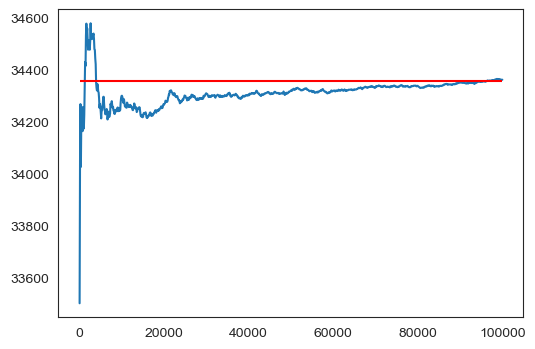

In [32]:
np.random.seed(0)

fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(111)

# 총 10만번 실제 중위소득 선택
size = 100_001
income100k_transformed = np.random.choice(range(1, 6), size, p=prob_income) * 10000 + 5000

# 100번 던질 때마다 누적 평균값 계산
income_means_transformed = [income100k_transformed[:step].mean() for step in range(100, size, 100)]
plt.plot(range(100, size, 100), income_means_transformed)

# 평균값들의 기댓값
plt.hlines(mu_transformed, 100, size, color='red')

plt.show()

이상하게도 표준편차는 동일하게 계산된다.
결론적으로 엄밀한 계산이 요구되는 경우엔 부동소수점 연산을 매우 조심스럽게 다뤄야 하지만
여기서는 그렇지 않기에 더 이상 언급하지 않는다.

In [26]:
V_transformed = np.sum([(10000 * x + 5000 - mu_transformed)**2 * f_income(x) for x in range(1, 6)])
sigma_transformed = np.sqrt(V_transformed)
sigma_transformed

10093.332233

## 연속 확률 변수의 기댓값과 분산

(준비중)

## 연습문제

참고: [(연습) 기댓값과 분산](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-expected_values.ipynb)